In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('C:/Users/gokul/Downloads/Week-4-Pandas/ml-20m/movies.csv', sep =',')
len(movies)

27278

In [4]:
len(movies['title'].unique())

27262

In [5]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
ratings = pd.read_csv('C:/Users/gokul/Downloads/Week-4-Pandas/ml-20m/ratings.csv', sep=',')

In [7]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676


In [8]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [9]:
tags = pd.read_csv('C:/Users/gokul/Downloads/Week-4-Pandas/ml-20m/tags.csv', sep=',')
len(tags)

465564

In [10]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [11]:
tags = tags.dropna()
len(tags)


465548

In [12]:
#movies.duplicated(subset='title',keep='first')
movies = movies.drop_duplicates(subset = 'title', keep='first')
len(movies['title'])

27262

In [13]:
movies = movies.drop_duplicates(subset = 'title', keep='first')
len(movies['title'])

27262

In [14]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [15]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp               int64
parsed_time    datetime64[ns]
dtype: object

In [16]:
ratings['parsed_time']=pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head(2)

,userId,movieId,rating,timestamp,parsed_time
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16


In [17]:
#del ratings['timestamp']
#del tags['timestamp']
del tags['timestamp']
del ratings['timestamp']

In [18]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [19]:
ratings.head(2)

,userId,movieId,rating,parsed_time
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


In [20]:
tags.head(2)

,userId,movieId,tag,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18


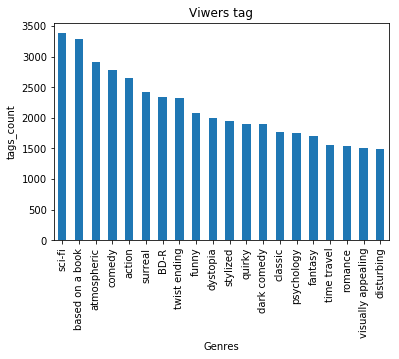

In [79]:
tag_counts = tags['tag'].value_counts()
graph_data = tag_counts.head(20)

graph_data.plot.bar()

plt.xlabel('Genres')
plt.ylabel('tags_count')
plt.title('Viwers tag')
plt.show()
#tag_counts = tag_counts.to_frame()
#graph_data = tag_counts.head(20)
#tags['tag'].groupby(by = 'tag', sort = True).count()
#graph_data = graph_data.to_frame()
#type(graph_data)
#graph_data
#plt.plot(tag_count[])
#graph_data


In [26]:
#filtered only sci-fi related movies
scifi = tags['tag'].str.contains('sci-fi')
scifi_list = tags[scifi]
scifi_list.head(2)

,userId,movieId,tag,parsed_time
162,129,4878,sci-fi,2011-04-04 03:11:10
259,190,2011,sci-fi,2012-02-12 19:29:36


In [23]:
#aggregated by movie id and listed movie rating count more than 1000
#ratings_count = pd.DataFrame[ratings[['movieId','rating']].groupby('rating').count()]
#len(ratings_count[ratings_count['rating']>1000])
#type(ratings_count)
#ratings_count.head()
#ratings_count['ratings'] = (0.5,1,1.5,2,2.5,3,3.5,4,4.5,5)
#ratings_count.head()

In [30]:
#del movies['parsed_time']
#del scifi_list['parsed_time']
merge1 = movies.merge(scifi_list, on='movieId', how='inner')

#del scifi_list['parsed_time']
merge1.head(3)

,movieId,title,genres,userId,tag
0,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,55795,sci-fi
1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,111841,sci-fi
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2702,sci-fi


In [31]:
merge2 = merge1.merge(ratings, on='movieId', how='inner')
merge2.head(2)

,movieId,title,genres,userId_x,tag,userId_y,rating,parsed_time
0,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,55795,sci-fi,1,3.5,2005-04-02 23:31:16
1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,55795,sci-fi,27,3.0,2005-03-31 04:39:31


In [133]:
len(ratings[ratings['movieId']==2])

22243

In [32]:
#len(ratings['movieId'].unique())

movie_avg_rating = ratings[['movieId','rating']].groupby('movieId', as_index =False).mean()
movie_avg_rating.shape
#movie_rating.head(2)
#yy =xx[xx['rating']>4]

(26744, 2)

In [33]:
movie_count_rating = ratings[['movieId','rating']].groupby('movieId', as_index =False).count()
movie_count_rating.columns = ['movieId','rating_count']
movie_count_rating.head(2)

,movieId,rating_count
0,1,49695
1,2,22243


In [34]:
movie_genres = movies['genres'].str.split('|', expand=True)
movie_genres.columns = ['gener0','gener1','gener2','gener3','gener4','gener5','gener6','gener7','gener8','gener9']
movie_genres.head(2)

,gener0,gener1,gener2,gener3,gener4,gener5,gener6,gener7,gener8,gener9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None


In [141]:
#del merge2['timestamp']
#del merge2['parsed_time_x']
#del merge2['parsed_time_y']

In [35]:
movie_genres['title'] = movies['title']
movie_genres['movieId'] = movies['movieId']
movie_genres.shape

(27262, 12)

In [37]:
#this merge give the average rating per movie and if rating is not available inner join will remove those movies
movie_rating= movie_avg_rating.merge(movie_genres,on='movieId',how='inner')
#movie_rating.head(2)

In [38]:
movie_avg_count_rating= movie_count_rating.merge(movie_rating,on='movieId',how='inner')
movie_avg_count_rating.head()

,movieId,rating_count,rating,gener0,gener1,gener2,gener3,gener4,gener5,gener6,gener7,gener8,gener9,title
0,1,49695,3.921240,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,Toy Story (1995)
1,2,22243,3.211977,Adventure,Children,Fantasy,None,None,None,None,None,None,None,Jumanji (1995)
2,3,12735,3.151040,Comedy,Romance,None,None,None,None,None,None,None,None,Grumpier Old Men (1995)
3,4,2756,2.861393,Comedy,Drama,Romance,None,None,None,None,None,None,None,Waiting to Exhale (1995)
4,5,12161,3.064592,Comedy,None,None,None,None,None,None,None,None,None,Father of the Bride Part II (1995)


In [40]:
len(movie_rating['gener1'].unique())
movies_copy = movies
del movies_copy['title']
movies_copy.dtypes
movies_copy.shape

(27262, 2)

In [103]:

high_rating_movies = movie_avg_count_rating[movie_avg_count_rating['rating_count']>25000]

ascend_movie = high_rating_movies.sort_values(by='rating', ascending=False)

ascend = ascend_movie.merge(movies_copy,on='movieId',how='inner')
ascend.head(2)


,movieId,rating_count,rating,gener0,gener1,gener2,gener3,gener4,gener5,gener6,gener7,gener8,gener9,title,genres
0,318,63366,4.446990,Crime,Drama,None,None,None,None,None,None,None,None,"Shawshank Redemption, The (1994)",Crime|Drama
1,858,41355,4.364732,Crime,Drama,None,None,None,None,None,None,None,None,"Godfather, The (1972)",Crime|Drama


In [99]:
is_scifi = ascend['genres'].str.contains('Sci-Fi')

scifi_movies = ascend[is_scifi]
scifi_movies['rating'].mean()
#scifi_movies['rating_count'].mean()

3.7416292878694075

In [102]:
is_comedy = ascend['genres'].str.contains('Drama')

Comedy_movies = ascend[is_comedy]
Comedy_movies['rating'].mean()
#Comedy_movies['rating_count'].mean()

3.90105710987688

In [71]:
ascend_counting = high_rating_movies.sort_values(by='rating_count', ascending=False)
ascend_count = ascend_counting.merge(movies_copy,on='movieId',how='inner')
ascend_count.head()

,movieId,rating_count,rating,gener0,gener1,gener2,gener3,gener4,gener5,gener6,gener7,gener8,gener9,title,genres
0,296,67310,4.174231,Comedy,Crime,Drama,Thriller,None,None,None,None,None,None,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,356,66172,4.029000,Comedy,Drama,Romance,War,None,None,None,None,None,None,Forrest Gump (1994),Comedy|Drama|Romance|War
2,318,63366,4.446990,Crime,Drama,None,None,None,None,None,None,None,None,"Shawshank Redemption, The (1994)",Crime|Drama
3,593,63299,4.177057,Crime,Horror,Thriller,None,None,None,None,None,None,None,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,480,59715,3.664741,Action,Adventure,Sci-Fi,Thriller,None,None,None,None,None,None,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [68]:
#yy = xx[xx['gener0'].str.contains('Sci-Fi') | xx['gener1'].str.contains('Sci-Fi') | xx['gener2'].str.contains('Sci-Fi') | xx['gener3'].str.contains('Sci-Fi')| xx['gener4'].str.contains('Sci-Fi') | xx['gener5'].str.contains('Sci-Fi')| xx['gener6'].str.contains('Sci-Fi') | xx['gener7'].str.contains('Sci-Fi')| xx['gener8'].str.contains('Sci-Fi') | xx['gener9'].str.contains('Sci-Fi')]
zz = ascend[ascend['genres'].str.contains('Sci-Fi')]
#yy.sort_values(by='movieId', ascending=True)
#yy.sort_values(by='rating', ascending=False)

#zz
#len(xx[xx['gener0'].str.contains('Sci-Fi')])
#xx['gener0','gener1'].value_counts(normalize=False,sort = True, ascending = False)
#xx.apply(xx.value_counts)

In [322]:
#plt.bar(yy['rating'].values,yy['gener0'].values)
#plt.show()

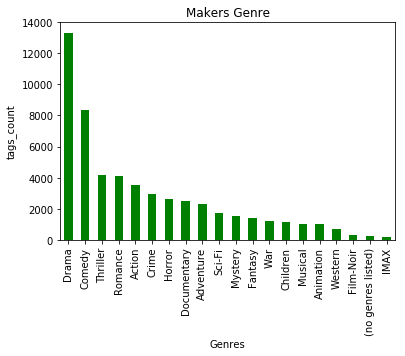

In [81]:
abc = movies['genres'].str.split('|', expand=True)
graph1_data = abc.stack().value_counts()
graph1_data.plot.bar(color='green')
plt.xlabel('Genres')
plt.ylabel('tags_count')
plt.title('Makers Genre')
plt.show()
#graph1_data.shape
#type(graph1_data)

In [273]:
abc.head(2)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
